<h1>Digital Signal Processing - Class Activity Submission 2</h1>
<p>NIM: 122140008</p>

</h2>Analisis Sinyal FFT</h2>

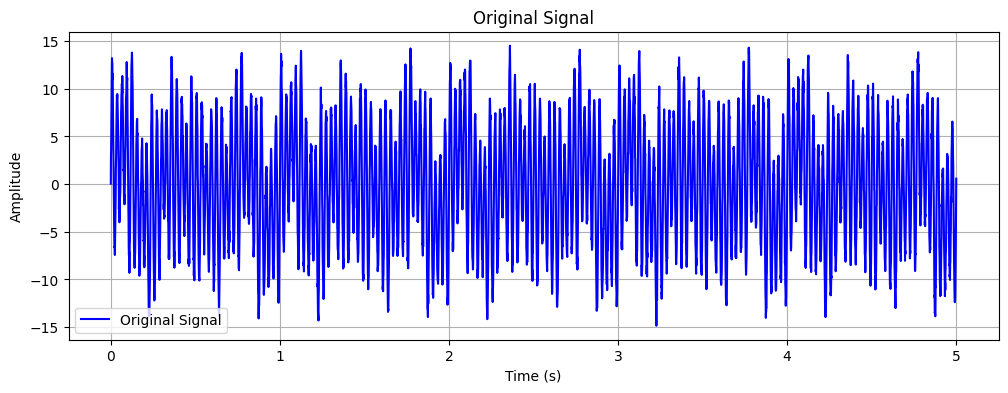

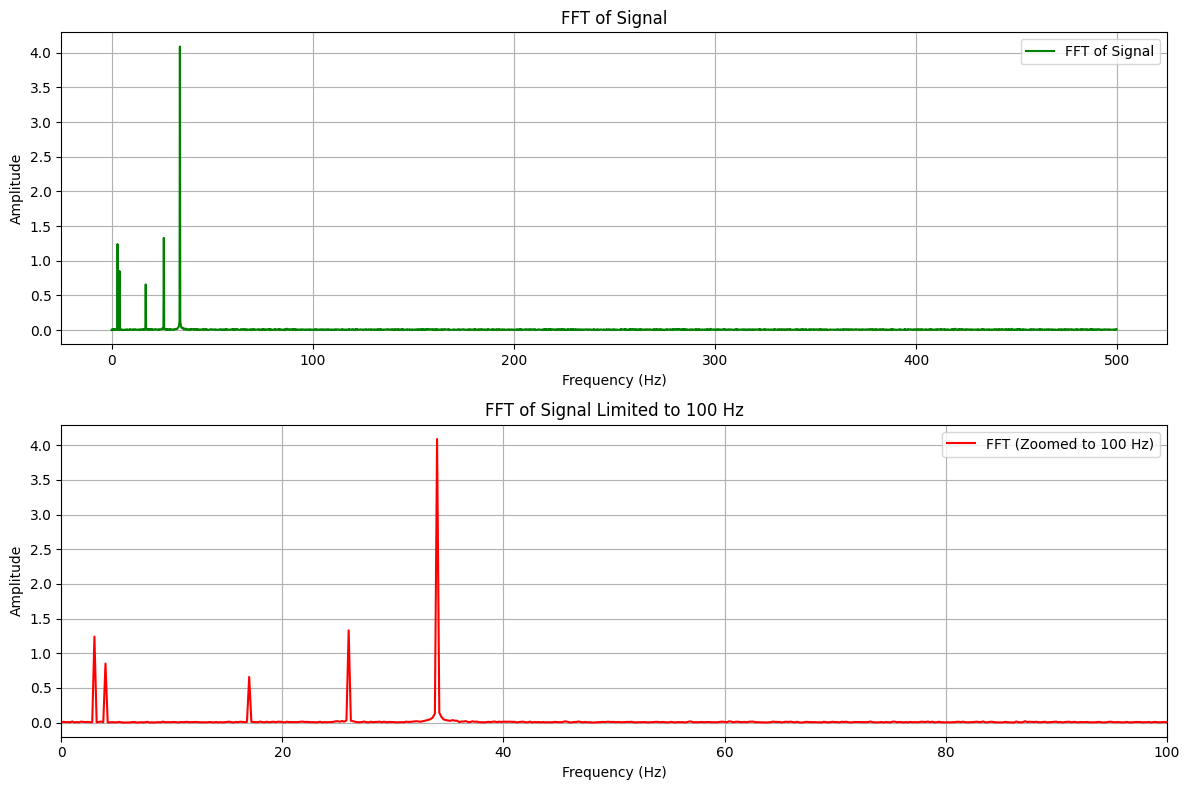

In [42]:
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt
from io import StringIO

# Membaca file CSV
file_name = 'signal_122140008.csv'
df = pd.read_csv(file_name)

# Mencocokan data dengan format yang diinginkan
time = df['time']
signal = df['amplitude']
    
# FFT
fft_result = np.fft.fft(signal)
N = len(signal)
T = time.iloc[1] - time.iloc[0]  # Sampling interval
fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
freq = np.arange(len(signal)//2) * fs / len(signal)
fft_values = np.abs(fft_result[:N//2]/N)  # Normalisasi
    
# Plot sinyal asli
plt.figure(figsize=(12, 4))
plt.plot(time, signal, label='Original Signal', color='blue')
plt.title('Original Signal')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot FFT dan FFT (Zoomed) sebagai subplot
plt.figure(figsize=(12, 8))

# Plot FFT
plt.subplot(2, 1, 1)
plt.plot(freq, fft_values, label='FFT of Signal', color='green')
plt.title('FFT of Signal')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

# Plot FFT (Zoomed)
plt.subplot(2, 1, 2)
plt.plot(freq, fft_values, label='FFT (Zoomed to 100 Hz)', color='red')
plt.xlim(0, 100)  # Zoom in on the first 100 Hz
plt.title('FFT of Signal Limited to 100 Hz')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()



<h3>Analisis FFT</h3>
<p>Dari hasil Visualisasi FFT sinyal di atas dapat dilihat bahwa beberapa puncak
terlihat dominan pada spektrum frekuensi rendah sekitar di bawah 40Hz.
Pada frekuensi ~35Hz terlihat merupakan puncak terbesar. Artinya frekuensi utama yang mendominasi
sinyal tersebut terletak dalam rentang ~35Hz.
</p>

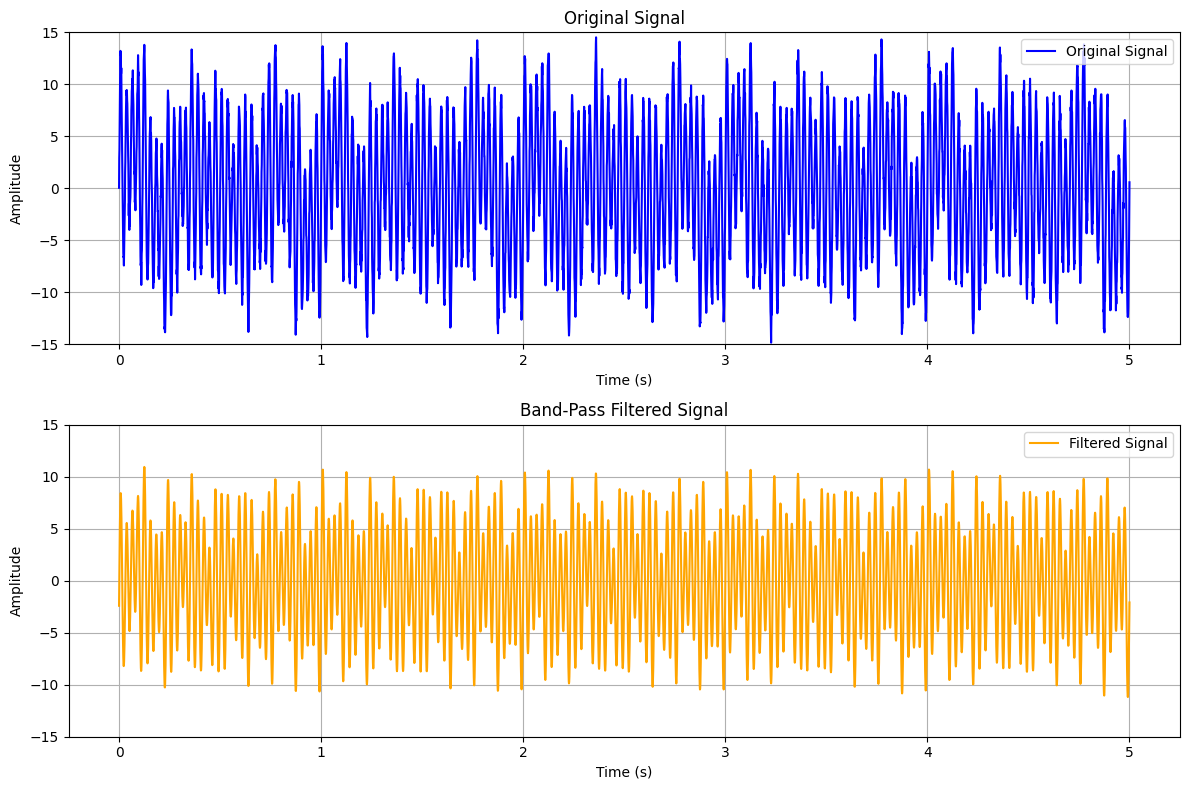

In [43]:
from scipy.signal import butter, filtfilt

# Menentukan rentang frekuensi untuk band-pass filter
low_cutoff = 4 # Frekuensi rendah (5 Hz) hasil dari analisis FFT sebelumnya
high_cutoff = 40 # Frekuensi tinggi (35 Hz) hasil dari analisis FFT sebelumnya

# Membuat band-pass filter
b, a = butter(N=4, Wn=[low_cutoff, high_cutoff], fs=fs, btype='band')

# Menerapkan filter pada sinyal asli
filtered_signal = filtfilt(b, a, signal)

# Membandingkan sinyal asli dan sinyal setelah band-pass filter
plt.figure(figsize=(12, 8))

# Plot sinyal asli
plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Original Signal', color='blue')
plt.ylim(-15, 15)  # Set y-limits for better visibility
plt.title('Original Signal')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot sinyal hasil filter
plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal, label='Filtered Signal', color='orange')
plt.ylim(-15, 15)  # Set y-limits for better visibility
plt.title('Band-Pass Filtered Signal')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

<h3>Analisis Band-Pass Signal</h3>
<p>Dari hasil visualisasi di atas dapat disimpulkan bahwa terdapat perbedaan yang cukup signifikan antara sinyal sebelum dan sesudah dilakukan filter band-pass. Perbedaan dapat dilihat dengan perbandingan sebagai berikut.</p>

<h4>Sinyal Asli:</h4>
<li>Tampak kompleks dan tidak teratur.</li>
<li>Variasi Amplitudo yang sangat besar.</li>
<li>Ada lonjakan mendadak di beberapa waktu.</li>

<h4>Sinyal hasil Band-Pass Filtering:</h4>
<li>Bentuk gelombangnya jauh lebih halus dan teratur.</li>
<li>Amplitudo lebih terkonsentrasi di kisaran ±8, dan tidak mengalami lonjakan ekstrem seperti sinyal asli.</li>
<li>Tampak Amplitudo naik & turun secara berkala.</li>

<h2>Lampiran</h2>
<a href="https://chatgpt.com/share/68105a84-e2b4-8010-a3ad-77ef1a1a2da6">Referensi penggunaan LLM</a>